# Exploratory Analysis of Prosper Loan Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df=pd.read_csv('prosperLoanData.csv')

This file is large so we are expecting alot of variables, data, or both

In [3]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [5]:
df.shape

(113937, 81)

It looks like the answer is both, there are alot of variables and 113937 rows of data. We need to find variables to answer questions we have and explore their relationships. I will try to find variables that affect borrower rate.

## What Affects the Borrowers Rate?

My first guess be to suspect the borrower rate and the loan amount are correlated. Lets see if this is true.

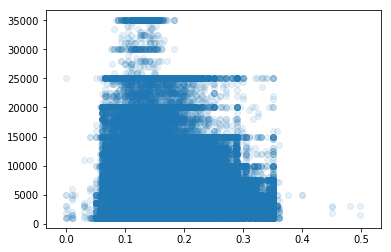

In [6]:
plt.scatter(data=df,x='BorrowerRate',y='LoanOriginalAmount',alpha=0.1);

There seem to be too many data points so we will try a sample, and restrict the y-axis to be greater than 1.

In [7]:
df_sample=df.sample(10000)

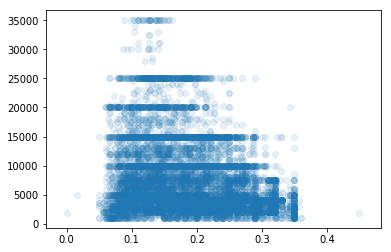

In [8]:
plt.scatter(data=df_sample,x='BorrowerRate',y='LoanOriginalAmount',alpha=0.1);

This is not a strong correlation but does show another area to explore. It seems there are alot of standard loan amounts with varying borrower interest rates.

In [9]:
df.BorrowerRate.value_counts()

0.3177    3672
0.3500    1905
0.3199    1651
0.2900    1508
0.2699    1319
0.1500    1182
0.1400    1035
0.1099     949
0.2000     907
0.1585     806
0.1800     800
0.1299     782
0.2099     776
0.2599     761
0.2199     739
0.1620     733
0.3134     726
0.1899     713
0.1550     713
0.1840     669
0.1449     629
0.1700     621
0.2085     613
0.2049     610
0.0990     610
0.1249     596
0.2500     578
0.2400     575
0.0974     566
0.1189     565
          ... 
0.0658       1
0.3153       1
0.1666       1
0.3433       1
0.1873       1
0.3360       1
0.0742       1
0.0868       1
0.0846       1
0.2777       1
0.3106       1
0.0832       1
0.0797       1
0.1432       1
0.2216       1
0.2252       1
0.2431       1
0.1822       1
0.3071       1
0.0614       1
0.3478       1
0.0638       1
0.0827       1
0.1367       1
0.2881       1
0.2717       1
0.1732       1
0.1704       1
0.1786       1
0.1721       1
Name: BorrowerRate, Length: 2294, dtype: int64

In [10]:
df.LoanOriginalAmount.value_counts()

4000     14333
15000    12407
10000    11106
5000      6990
2000      6067
3000      5749
25000     3630
20000     3291
1000      3206
2500      2992
7500      2975
7000      2949
6000      2869
3500      2567
8000      2442
12000     1921
9000      1695
13000     1509
1500      1507
4500      1406
6500      1343
8500      1059
5500       904
11000      781
9500       675
14000      640
11500      553
18000      506
12500      455
35000      430
         ...  
9443         1
18542        1
10466        1
6564         1
6692         1
10914        1
2790         1
8995         1
6948         1
11170        1
5029         1
7268         1
5221         1
11490        1
5349         1
2345         1
7524         1
11938        1
24300        1
16160        1
5925         1
12130        1
1895         1
34679        1
2089         1
14383        1
6251         1
14447        1
6379         1
4098         1
Name: LoanOriginalAmount, Length: 2468, dtype: int64

There seem to be alot of unique values with a specific one time occurance.

Now lets incorporate credit grade in our exploratory analysis.

In [11]:
df.CreditGrade.value_counts()

C     5649
D     5153
B     4389
AA    3509
HR    3508
A     3315
E     3289
NC     141
Name: CreditGrade, dtype: int64

In [12]:
credit_grade= ['AA','A','B','C','D','E','HR','NC']
credit_grade_ordered= pd.api.types.CategoricalDtype(ordered=True, categories=credit_grade)
df['CreditGrade']=df['CreditGrade'].astype(credit_grade_ordered)
base_colour= sb.color_palette()[0]

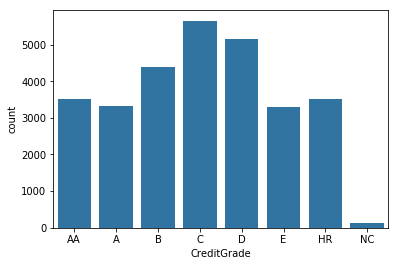

In [13]:
sb.countplot(data=df,x='CreditGrade',color=base_colour);

Credit grade is a categorical variable so we will have to be more creative in our eploratory analysis.

In [14]:
print(df_sample.BorrowerRate.describe())
print(df_sample.LoanCurrentDaysDelinquent.describe())
print(df_sample.LoanOriginalAmount.describe())

count    10000.000000
mean         0.192418
std          0.074736
min          0.000000
25%          0.131400
50%          0.184000
75%          0.250000
max          0.450000
Name: BorrowerRate, dtype: float64
count    10000.000000
mean       147.184800
std        457.526267
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2613.000000
Name: LoanCurrentDaysDelinquent, dtype: float64
count    10000.000000
mean      8386.324500
std       6276.006326
min       1000.000000
25%       4000.000000
50%       6500.000000
75%      12000.000000
max      35000.000000
Name: LoanOriginalAmount, dtype: float64


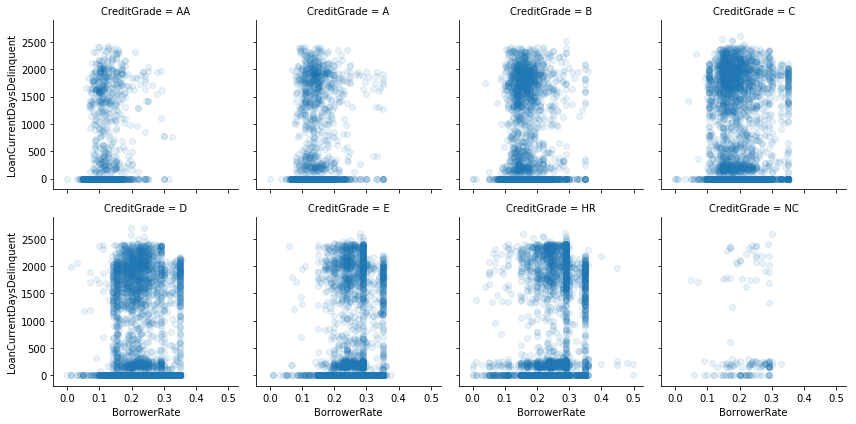

In [15]:
g=sb.FacetGrid(data=df,col='CreditGrade',col_wrap=4)
g.map(plt.scatter,'BorrowerRate','LoanCurrentDaysDelinquent',alpha=0.1);

I wouldnt expect a linear trend here because loans have a written contract stating the interest rate for the loan, but we do see that from these facet plots. The agreed borrower rate does not change depending on the amount of deliquent days or credit grade.

So let's see how borrower rate, original loan amount and credit grade are related.

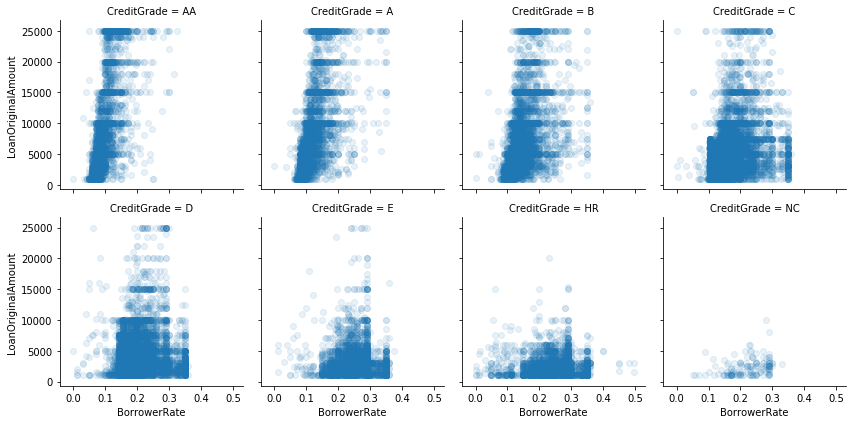

In [16]:
g=sb.FacetGrid(data=df,col='CreditGrade',col_wrap=4)
g.map(plt.scatter,'BorrowerRate','LoanOriginalAmount',alpha=0.1);

I was expecting to see a linear trend in these facet plots but it appears there is still a dependency on another variable which is giving these variations of borrower rates for the same loan amount within each credit score. Lets see if the borrower owns a home affects their borrower's rate.

In [17]:
df.IsBorrowerHomeowner.head()

0     True
1    False
2    False
3     True
4     True
Name: IsBorrowerHomeowner, dtype: bool

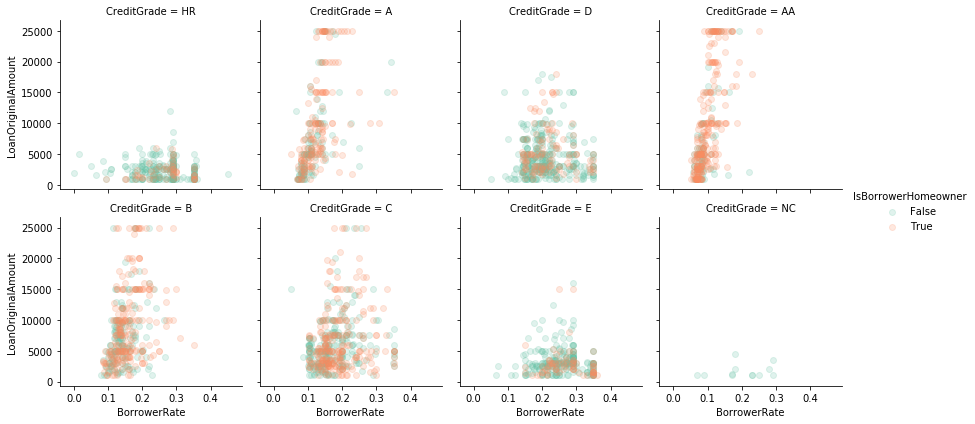

In [18]:
g=sb.FacetGrid(data=df_sample,col='CreditGrade',hue='IsBorrowerHomeowner',palette='Set2',col_wrap=4)
g.map(plt.scatter,'BorrowerRate','LoanOriginalAmount',alpha=0.2)
g.add_legend();

There doesn't seem to be a difference in borrower rates if you own a home, or the loan amount within each credit grade. It does show people with no credit usually don't own a home which is no surprise. 

Let's check to see if borrower rate is affected by debt to income ratio.

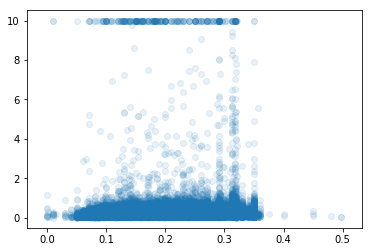

In [19]:
plt.scatter(data=df,x='BorrowerRate',y='DebtToIncomeRatio',alpha=0.1);

Surprisingly the is not a strong correlation. Individually checking variables is taking too long and my best guesses don't show a strong correlation. We could've use a plot matrix to show our same conclusions.

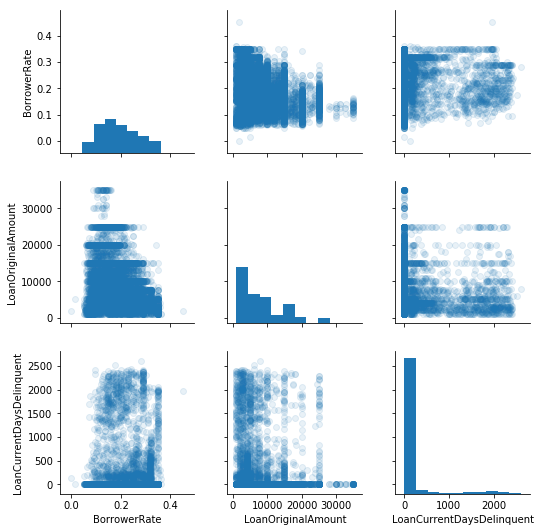

In [20]:
g=sb.PairGrid(data=df_sample,vars=['BorrowerRate','LoanOriginalAmount','LoanCurrentDaysDelinquent'])
g.map_offdiag(plt.scatter,alpha=0.1)
g.map_diag(plt.hist);

Lets use the pair grid again for more variables to narrow down the factors used in determining borrower rate. We will use: BorrowerRate, Investors, Loan Original Amount, Open Revolving Monthly Payment, Amount Delinquent, Term.

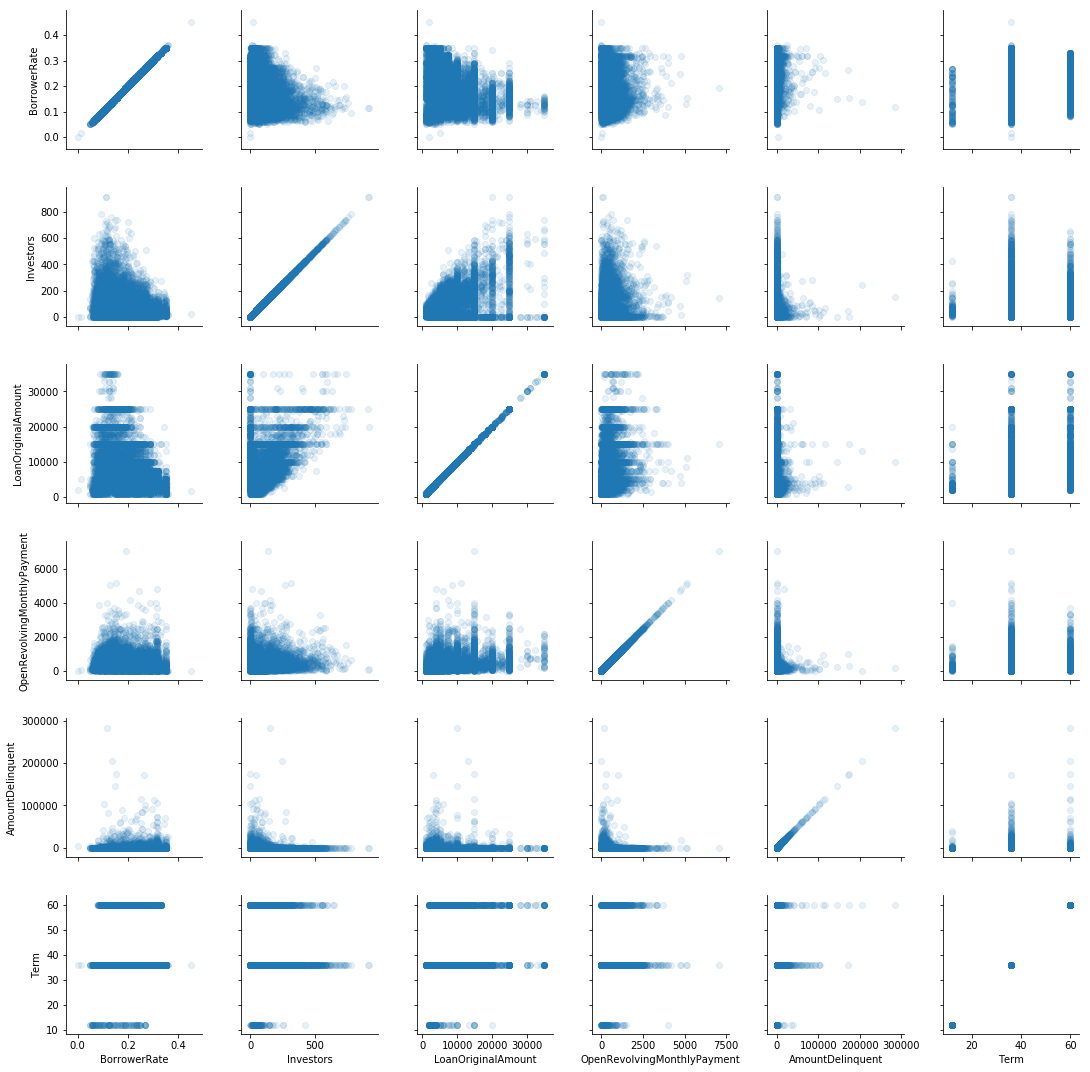

In [21]:
g=sb.PairGrid(data=df_sample,vars=['BorrowerRate','Investors','LoanOriginalAmount','OpenRevolvingMonthlyPayment','AmountDelinquent','Term'])
g.map(plt.scatter,alpha=0.1);

There is something interesting going on with the borrowers rate and the number of investors. Lets take a closer look.

In [22]:
credit_grade= ['AA','A','B','C','D','E','HR','NC']
credit_grade_ordered= pd.api.types.CategoricalDtype(ordered=True, categories=credit_grade)
df['CreditGrade']=df['CreditGrade'].astype(credit_grade_ordered)

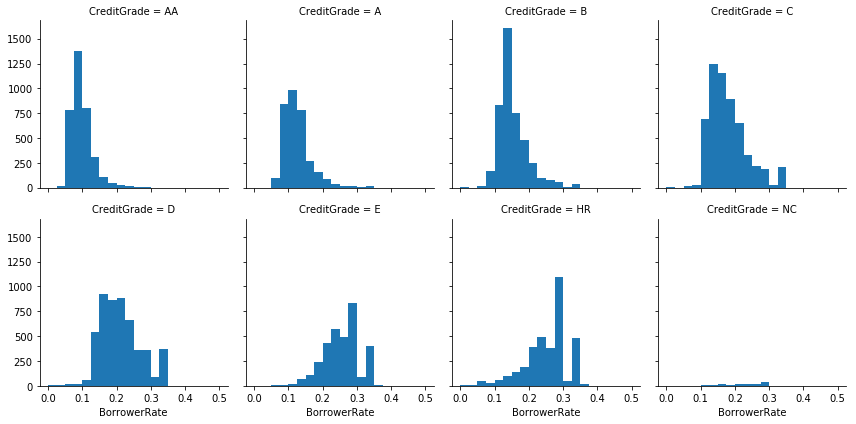

In [23]:
bins=np.arange(0,0.5+0.025,0.025)
g=sb.FacetGrid(data=df,col='CreditGrade',col_wrap=4)
g.map(plt.hist,'BorrowerRate',bins=bins);

We can see that credit score does correlate to a lower borrower rate. Credit grades AA, A, B, C and D are all right skewed towards lower borrower rates. Credit E, HR, and NC are left skewed to higher borrower rates.

Let's explore this further by comparing borrower rate, credit grade and number of investors.

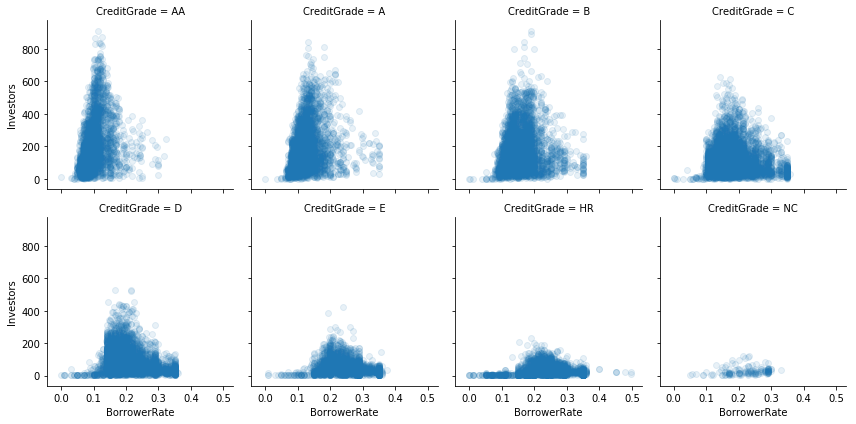

In [24]:
g=sb.FacetGrid(data=df,col='CreditGrade',col_wrap=4)
g.map(plt.scatter,'BorrowerRate','Investors',alpha=0.1);

A high number of investors does correlate to a lower borrower rate for credit scores AA, A, B, C. This won't be the only factor affecting borrower rate. Lets add another variable to the previous plot for verifiable income.

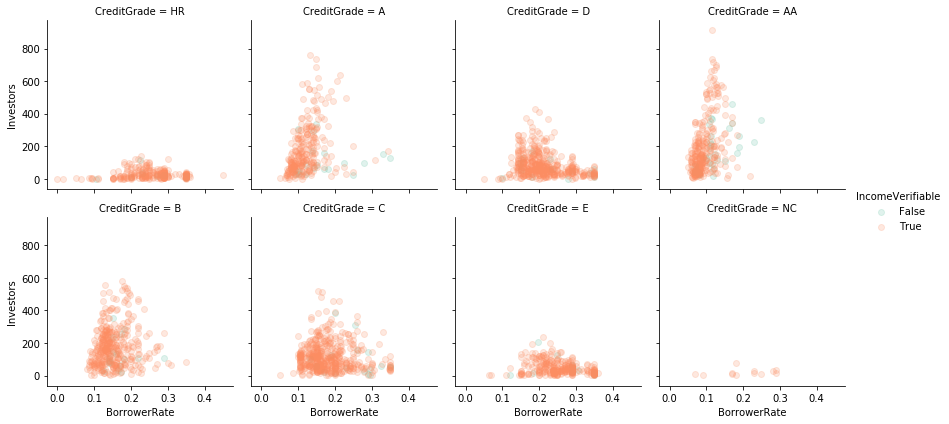

In [25]:
g=sb.FacetGrid(data=df_sample,col='CreditGrade',hue='IncomeVerifiable',palette='Set2',col_wrap=4)
g.map(plt.scatter,'BorrowerRate','Investors',alpha=0.2)
g.add_legend();

This does not add any insight becase there is not a strong correlation. Lets look at income ranges and compare them to borrower rates.

In [26]:
df.IncomeRange.value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

In [27]:
income_range= ['Not Displayed','Not Employed','$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']
income_range_ordered= pd.api.types.CategoricalDtype(ordered=True, categories=income_range)
df['IncomeRange']=df['IncomeRange'].astype(income_range_ordered)

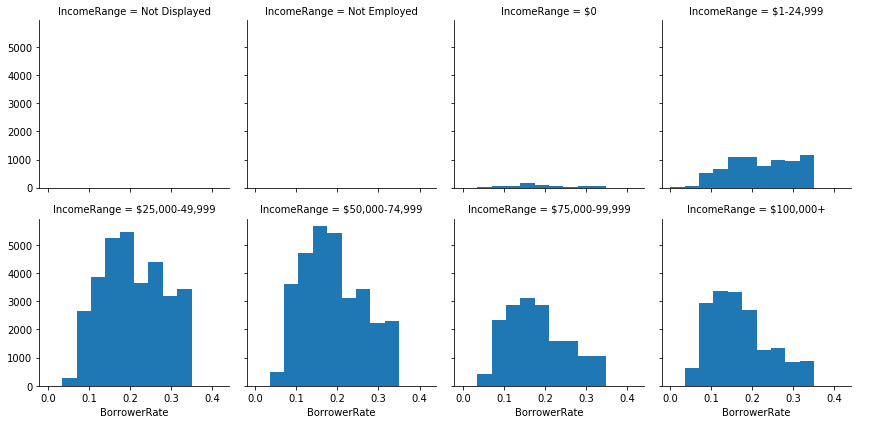

In [28]:
bins=np.arange(0,0.4+0.035,0.035)
g=sb.FacetGrid(data=df,col='IncomeRange',col_wrap=4)
g.map(plt.hist,'BorrowerRate',bins=bins)
g.add_legend();

The distributions show a couple of interesting things. For the income ranges of 100,000+, 75,000-99,999, 50,000-74,999 the distribution is right skewed towards a lower borrower rate. For the income ranges 25,000-49,999, 1-24,999 it is a bimodal distribution which would hint at more factors that would affect their borrower rates. This makes sense because they have less income.

Now lets compare borrower rate, investors and sort by income range.

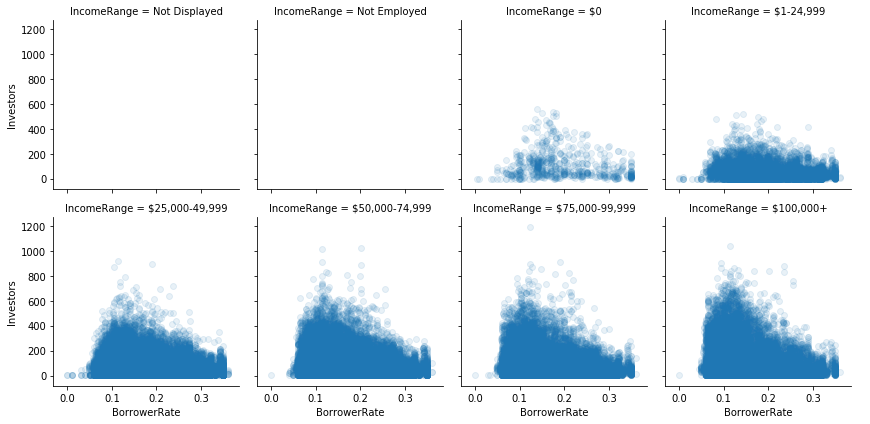

In [29]:
g=sb.FacetGrid(data=df,col='IncomeRange',col_wrap=4)
g.map(plt.scatter,'BorrowerRate','Investors',alpha=0.1)
g.add_legend();

From this we can see one of the factors that would lower the borrower rate is the number of investors for each income range. 

We can conclude that borrower rate is affected most by credit score, income range and number of investors.

Lets see what the loans are being used for.


In [30]:
df.replace(to_replace={"ListingCategory (numeric)": {0: "Unknown", 1: "Debt", 2: "Reno",
                                                     3: "Business", 4: "Personal",5: "Student",
                                                     6: "Auto", 7: "Other", 8: "Baby", 9: "Boat", 
                                                     10: "Cosmetic", 11: "Engagement", 12: "Green", 
                                                     13: "Household",14: "LargePurchase", 15: "Medical",
                                                     16: "Motorcycle", 17: "RV",18: "Taxes", 19: "Vacation",
                                                     20: "Wedding"}}, inplace=True)
df.rename(index=str, columns={"ListingCategory (numeric)": "ListingCategory"}, inplace=True)

Text(0.5, 1.0, 'Proptional Loan Usage')

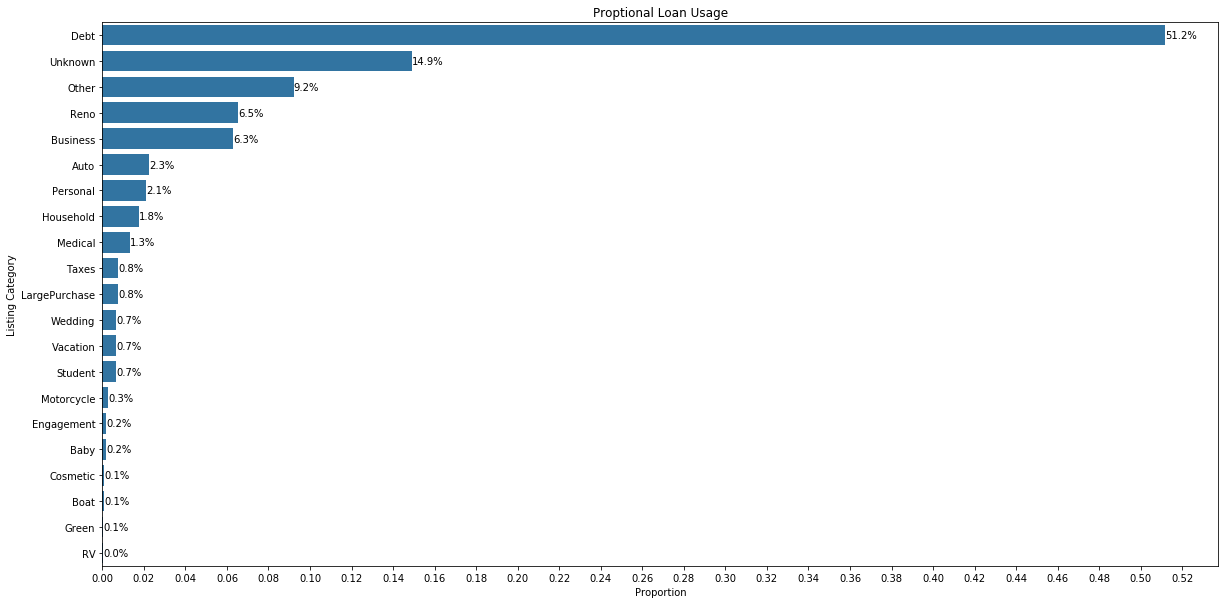

In [31]:
type_counts = df['ListingCategory'].value_counts()
type_order = type_counts.index


n_Loans = df.shape[0]
max_type_count = type_counts[0]
max_prop = max_type_count / n_Loans


base_color = sb.color_palette()[0]
tick_props = np.arange(0, max_prop+0.02, 0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

base_color = sb.color_palette()[0]
plt.figure(figsize=(20,10))
sb.countplot(data = df, y = 'ListingCategory', color = base_color, order = type_order)

for i in range(type_counts.shape[0]):
    count=type_counts[i]
    pct_string='{:0.1f}%'.format(100*count/n_Loans)
    plt.text(count+1,i,pct_string,va='center')

plt.xticks(tick_props * n_Loans, tick_names)
plt.xlabel('Proportion')
plt.ylabel('Listing Category')
plt.title('Proptional Loan Usage')

We can see that majority of the loans are being used for debt. This would explain why it was hard to find variabes that affect borrower rate. They must use a more comprhensive evaluation besides the basic credit score, income range and number of investors.

Lets look at the prosper rating and see if it is the same as the credit score to confirm our hypothesis.

In [32]:
df.ProsperRating.value_counts().sum()

AttributeError: 'DataFrame' object has no attribute 'ProsperRating'

In [ ]:
df.CreditGrade.value_counts().sum()

In [ ]:
df.replace(to_replace={"ProsperRating (numeric)": {0: "NC", 1: "HR", 2: "E",3: "D", 4: "C",5: "B",
                                                     6: "A", 7: "AA",}}, inplace=True)
df.rename(index=str, columns={"ProsperRating (numeric)": "ProsperRating"}, inplace=True)

prosper_rating= ['AA','A','B','C','D','E','HR','NC']
prosper_rating_ordered= pd.api.types.CategoricalDtype(ordered=True, categories=prosper_rating)
df['ProsperRating']=df['ProsperRating'].astype(prosper_rating_ordered)

plt.figure(figsize = [15, 5])

plt.subplot(1, 2, 1)
sb.countplot(data=df,x='CreditGrade',color=base_colour)
plt.ylim(0,20000)

plt.subplot(1, 2, 2)
sb.countplot(data=df,x='ProsperRating',color=base_colour)
plt.ylim(0,20000);

It seems our hypothesis is correct. There are more prosper ratings than credit scores for every category. Therefore they must be using a more comprehensive formula for calculating borrower rate than our assumed credit score, income range and number of investors because there are more proseper ratings than credit scores. This means they have to build their prosper rating metric without credit score and may calculate it using lots of variables. We could continue this analysis and figure out how these variables correlate to the prosper rating.

## Conclusion

Prosper records lots of useful information on their clients and our analysis shows they use this to make a borrower rate. We found credit grade, investors, and income range affect borrower rate. However, we should continue this analysis because we found there are more prosper ratings than credit scores listed so this is probably a more useful metric to determine how a borrower rate fluctuates. Therefore, understanding the factors that influence the prosper rate would be a useful investigation.